In [1]:
from TTVFit.ttvfit import *

In [2]:
period = 5.72148926
target = 'WASP-107b'
data = pd.read_csv('example1/t.csv')
data

,T_mid,Uncertainty,Label,Reference,Epoch
0,2.456514e+06,0.000100,Others,2017A&A...604A.110A,0
1,2.457584e+06,0.000011,Others,2017MNRAS.469.1622M,187
2,2.457905e+06,0.000047,HST,Ma et al. 2024,243
3,2.457910e+06,0.000046,HST,Ma et al. 2024,244
4,2.458580e+06,0.000429,TESS,Ivshina & Winn 2022,361
5,2.458591e+06,0.000355,TESS,Ivshina & Winn 2022,363
6,2.459959e+06,0.000027,JWST,This Work,602
7,2.459964e+06,0.000015,JWST,This Work,603
8,2.460108e+06,0.000010,JWST,This Work,628
9,2.460119e+06,0.000042,JWST,This Work,630


In [3]:
data = data[['T_mid','Uncertainty']].copy()
data

,T_mid,Uncertainty
0,2.456514e+06,0.000100
1,2.457584e+06,0.000011
2,2.457905e+06,0.000047
3,2.457910e+06,0.000046
4,2.458580e+06,0.000429
5,2.458591e+06,0.000355
6,2.459959e+06,0.000027
7,2.459964e+06,0.000015
8,2.460108e+06,0.000010
9,2.460119e+06,0.000042


In [4]:
eccentricity_est = [0,0.1,'U']
omega_est = [0,2*np.pi,'U']
p_dot_est = [0,200,'N']
domega_est = [0,1e-1,'N']

period_est = [period - 0.0002, period + 0.0002,'U']
times0 = data['T_mid'][0]
times0_est = [times0 - 0.05, times0 + 0.05,'U']

pdot_parameters = [
    p_dot_est,
]

precession_parameters = [
    eccentricity_est,
    omega_est,
    domega_est,
]

# kind = 'Precession'
kind = 'Pdot'
# kind = 'Linear'
rej_sigma = 5
multiprocessing = True
# sampler = 'emcee'
sampler = 'dynesty'
# sampler = 'dynamic_dynesty'
parameters = [times0_est,period_est]
parameter_names = [r'$t_0$',r'$Period$']

sampler_parameters = {
    'emcee':{
        'nwalkers':100,
        'nsteps':2000,
        'nburnin':200,
    },
    'dynesty':{
        'nlive':2000,
        'dlogz':0.0001,
    },
    'dynamic_dynesty':{
        'nlive_init':30000,
        'dlogz_init':0.001,
    }
}

if kind == 'Precession':
    parameters += precession_parameters
    parameter_names += [r'$eccentricity$',r'$\omega[radian]$',r'$d\omega/dN[radian/epoch]$']
    print(parameters)
elif kind == 'Pdot':
    parameters += pdot_parameters
    parameter_names += [r'$\dot{P}[ms/yr]$']
    print(parameters)
else:
    print(parameters)

TTVFIT = TTVFit(data,period,parameters,parameter_names,kind,rej_sigma,multiprocessing=multiprocessing,sampler=sampler,sampler_parameters=sampler_parameters[sampler])

[[2456514.3606000002, 2456514.4606, 'U'], [5.72128926, 5.721689260000001, 'U'], [0, 200, 'N']]
You are fitting TTV with Pdot model


Fitting begins...
You are fitting TTV with Pdot model
Start dynesty


59673it [02:00, 496.15it/s, +2000 | bound: 167 | nc: 1 | ncall: 1287492 | eff(%):  4.798 | loglstar:   -inf < -7.630 <    inf | logz: -28.248 +/-  0.098 | dlogz:  0.000 >  0.000]    

Finish dynesty
Multiprocessing took 120.5 seconds
rej: 0.0006729171361525802

Rejection =  0.0006729171361525802 

All keys =  [0]
You are fitting TTV with Linear model


Start dynesty


53264it [01:24, 631.42it/s, +2000 | bound: 145 | nc: 1 | ncall: 1094927 | eff(%):  5.057 | loglstar:   -inf < -66.395 <    inf | logz: -83.811 +/-  0.091 | dlogz:  0.000 >  0.000]   


Finish dynesty
Multiprocessing took 84.5 seconds

The BIC_pre is 22.468397341424847
Parameters_pre : 
 $t_0$ = (2456514.410670841, 7.82976858317852e-05, 8.002668619155884e-05) 
$Period$ = (5.721493706489485, 5.467347632404085e-07, 5.384260184371215e-07) 
$\dot{P}[ms/yr]$ = (-79.6143346218705, 7.415786913488745, 7.420115678807875)  

Fitting ends...


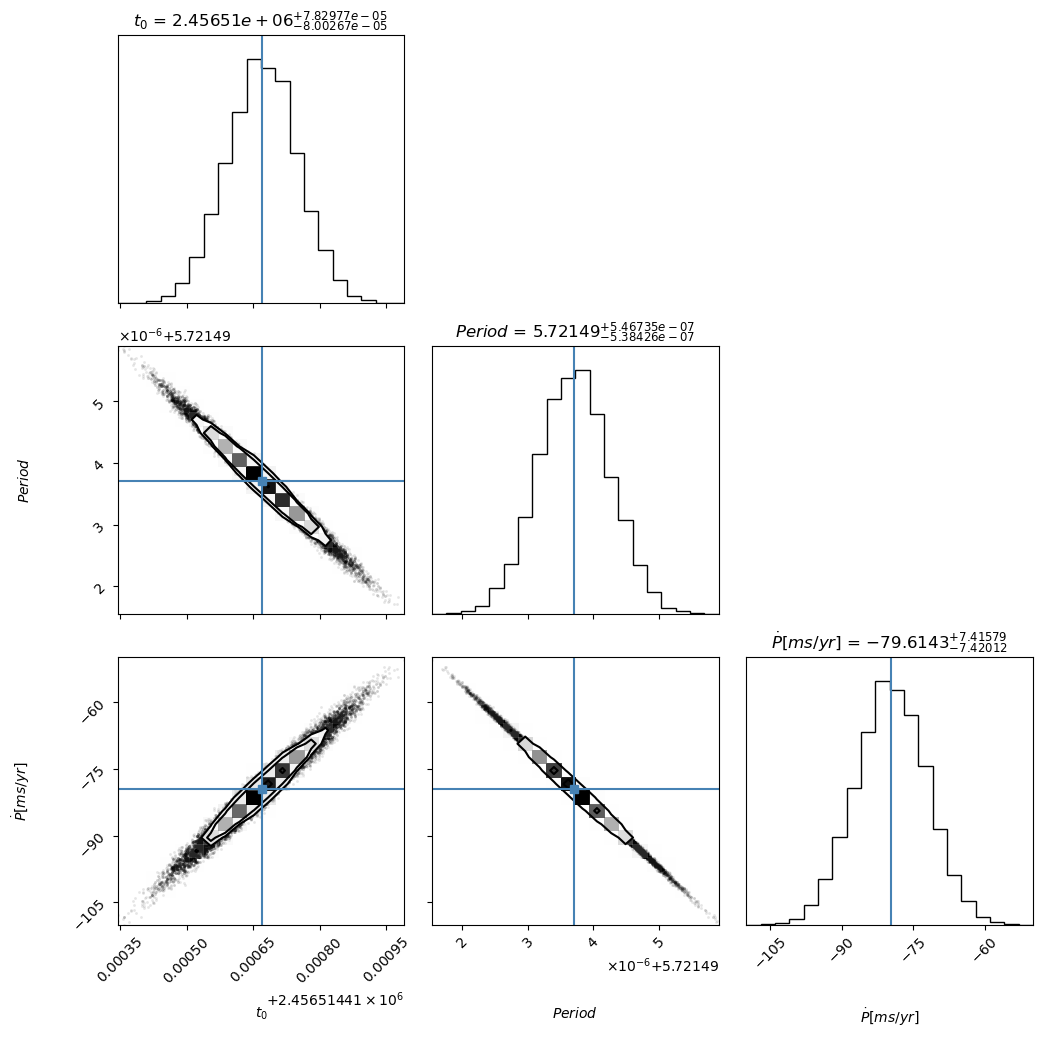

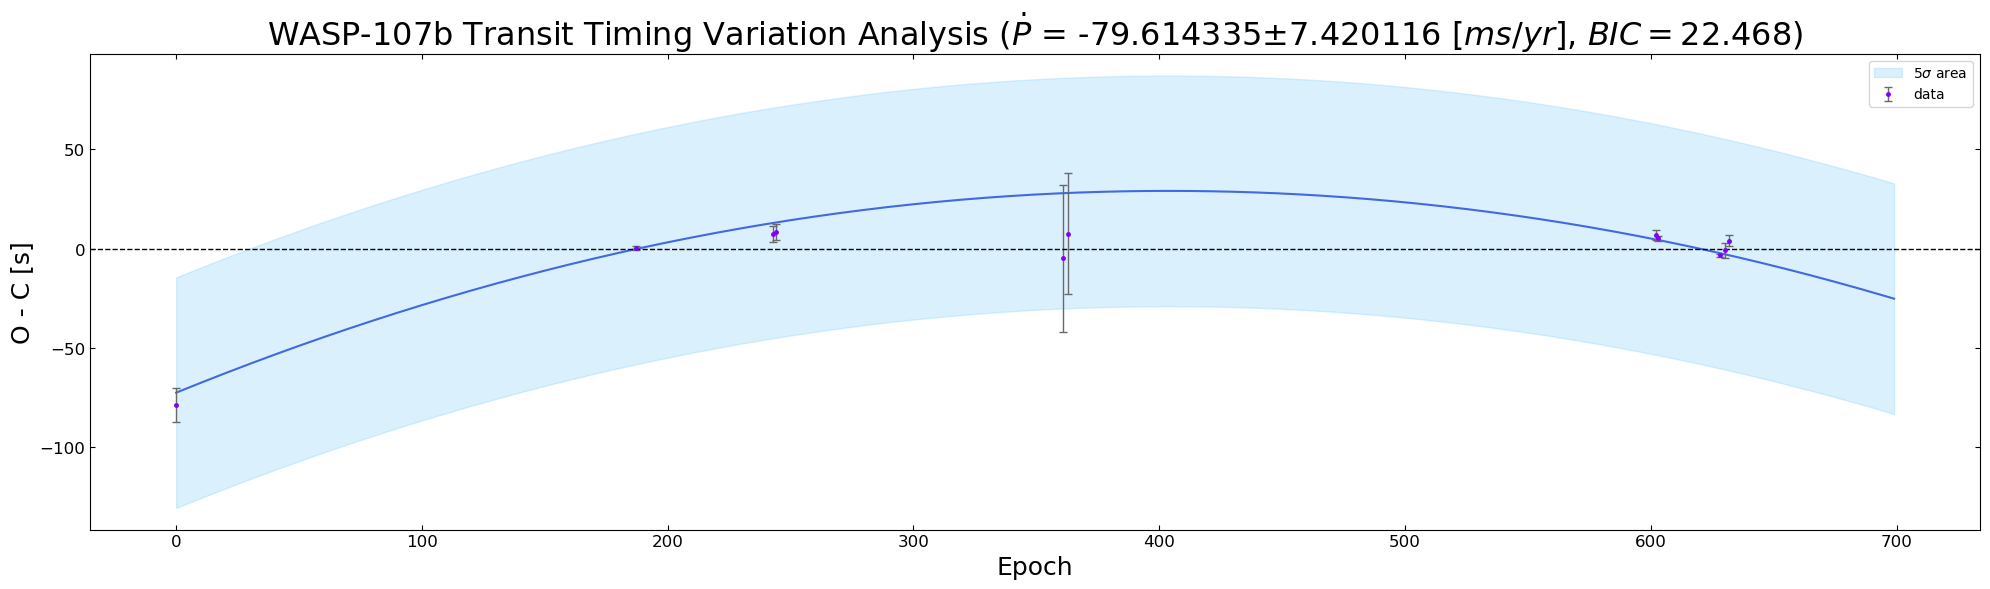

In [5]:
suffix = '_%ssigma'%rej_sigma
if kind != 'Linear':
    suffix += '_%s_%s_%s_%s'%(sampler,kind,target,parameters[-1])
else:
    suffix += '_%s_%s_%s'%(sampler,kind,target)
# suffix += ''
title = '%s Transit Timing Variation Analysis'%target
samples = TTVFIT.Fit('example2/',suffix,title)

In [6]:
# TTVFIT.loocv('example1/test/',suffix,param=(-79.51750321760551, 7.304891276552411, 7.3251064125082195),title=title)
# TTVFIT.loocv('example1/test/',suffix,title=title)